# HEART DISEASE PREDICTION


#### 1. lMPORT REQUIRED LIBRARIES

Load Required Libraries

In [443]:
# import useful libraries from installed packages

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go   
import plotly.io as pio
# pio.renderers.default = "browser"  # Set default renderer to browser
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Set default style for seaborn
sns.set(style="whitegrid")

%matplotlib inline

#### 2 DATA INVESTIGATION

 Extraction, Transform and Load The Datasets

In [444]:
# Load datasets from CSV files into pandas DataFrames
df = pd.read_csv("../datasets/heart_disease.csv") 
# Load the second dataset into a DataFrame
df2 = pd.read_csv("../datasets/heart_disease_integrated.csv")

#### 3. DATA EXPLORATION

In [445]:
# Display the first 5 rows of the DataFrame
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [446]:
df.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [447]:
# Displays the shape attribute of the DataFrame
df.shape

(1190, 12)

In [448]:
# Display concise summary of the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [449]:
# Display the columns of the DataFrame df
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [450]:
# Explore datatypes of the columns in the DataFrame

df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

#### 5. EXPLORATORY DATA ANALYSIS

I. EDA Using Y data profiling

In [451]:
# EDA using ydata profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Heart Disease Dataset Profiling Report", explorative=True)
profile.to_file("heart_disease_profiling_report.html")  # Save the report to an HTML file


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 125.51it/s]


II.  Basic Summary statistics

In [462]:
# Display basic summary statistics of the DataFrame
df.describe()

,age,sex,chest pain type,resting systolic bp,cholesterol,fasting blood sugar,resting ECG,max heart rate,exercise angina,ST depression,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [465]:
# Include categorical columns in the summary statistics
df.describe(include='category')

,sex,chest pain type,fasting blood sugar,resting ECG,exercise angina,ST slope,target
count,1190,1190,1190,1190,1190,1190,1190
unique,2,4,2,3,2,4,2
top,1,4,0,0,0,2,1
freq,909,625,936,684,729,582,629


#### 6. DATA CLEANING AND NORMALISATION

In [454]:
# explore the columns in the DataFrame
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

Rename Columns

In [456]:
# rename the 'resting bp s' column to 'resting systolic'
df.rename(columns={'resting bp s': 'resting systolic bp'}, inplace=True)
# rename the oldpeak column to ST depression
df.rename(columns={'oldpeak': 'ST depression'}, inplace=True)
# rename the 'resting ecg' column to 'resting ECG'
df.rename(columns={'resting ecg': 'resting ECG'}, inplace=True)
# check the columns again to confirm the changes
df.columns

Index(['age', 'sex', 'chest pain type', 'resting systolic bp', 'cholesterol',
       'fasting blood sugar', 'resting ECG', 'max heart rate',
       'exercise angina', 'ST depression', 'ST slope', 'target'],
      dtype='object')

Confirm First 5 and Last 5 Rows Of The Dataframe df

In [459]:
df.head()  # Display the first few rows of the DataFrame

,age,sex,chest pain type,resting systolic bp,cholesterol,fasting blood sugar,resting ECG,max heart rate,exercise angina,ST depression,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [463]:

df.tail()  # Display the last few rows of the DataFrame

,age,sex,chest pain type,resting systolic bp,cholesterol,fasting blood sugar,resting ECG,max heart rate,exercise angina,ST depression,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


Fix Or Normalise Categorical Datatypes

In [464]:
# convert to categorical datatypes

df['sex'] = df['sex'].astype('category')
df['chest pain type'] = df['chest pain type'].astype('category')
df['fasting blood sugar'] = df['fasting blood sugar'].astype('category')
df['resting ECG'] = df['resting ECG'].astype('category')
df['exercise angina'] = df['exercise angina'].astype('category')
df['ST slope'] = df['ST slope'].astype('category')
df['target'] = df['target'].astype('category')

# Display the updated DataFrame with new data types
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  1190 non-null   int64   
 1   sex                  1190 non-null   category
 2   chest pain type      1190 non-null   category
 3   resting systolic bp  1190 non-null   int64   
 4   cholesterol          1190 non-null   int64   
 5   fasting blood sugar  1190 non-null   category
 6   resting ECG          1190 non-null   category
 7   max heart rate       1190 non-null   int64   
 8   exercise angina      1190 non-null   category
 9   ST depression        1190 non-null   float64 
 10  ST slope             1190 non-null   category
 11  target               1190 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 55.8 KB


Check For Missing Values and Replace Missing Values

In [466]:
# Check for missing values in the DataFrame
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting systolic bp    0
cholesterol            0
fasting blood sugar    0
resting ECG            0
max heart rate         0
exercise angina        0
ST depression          0
ST slope               0
target                 0
dtype: int64

Remove Duplicates

In [467]:
# remove duplicates from the DataFrame
df.drop_duplicates(inplace=True)

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  918 non-null    int64   
 1   sex                  918 non-null    category
 2   chest pain type      918 non-null    category
 3   resting systolic bp  918 non-null    int64   
 4   cholesterol          918 non-null    int64   
 5   fasting blood sugar  918 non-null    category
 6   resting ECG          918 non-null    category
 7   max heart rate       918 non-null    int64   
 8   exercise angina      918 non-null    category
 9   ST depression        918 non-null    float64 
 10  ST slope             918 non-null    category
 11  target               918 non-null    category
dtypes: category(7), float64(1), int64(4)
memory usage: 50.3 KB


#### 7. DATA AUGMENTATION

Explore Second Datasets df2, Rename Required Columns and Add Required Columns to First Datasets (df)

In [469]:
# Note Key provided manually by the data collector and will be added to the ReadMe file
# Load the second dataset into a DataFrame and display information about it
df2 = pd.read_csv("../datasets/heart_disease_integrated.csv")
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       898 non-null    int64  
 1   0       898 non-null    int64  
 2   63      898 non-null    int64  
 3   1.1     898 non-null    int64  
 4   -9      898 non-null    int64  
 5   -9.1    898 non-null    int64  
 6   -9.2    898 non-null    int64  
 7   -9.3    898 non-null    int64  
 8   1.2     898 non-null    int64  
 9   145     898 non-null    int64  
 10  1.3     898 non-null    int64  
 11  233     898 non-null    int64  
 12  -9.4    898 non-null    int64  
 13  50      898 non-null    int64  
 14  20      898 non-null    int64  
 15  1.4     898 non-null    int64  
 16  -9.5    898 non-null    int64  
 17  1.5     898 non-null    int64  
 18  2       898 non-null    int64  
 19  2.1     898 non-null    int64  
 20  3       898 non-null    int64  
 21  81      898 non-null    int64  
 22  0.

In [470]:
# explore the shape of the DataFrame DF2
df2.shape

(898, 76)

Rename Two Useful Columns For This Project

In [471]:
# rename columns from the second DataFrame 
df2.rename(columns={
    '1.3': 'hypertension',
    '1.5': 'family history'
}, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 76 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   1               898 non-null    int64  
 1   0               898 non-null    int64  
 2   63              898 non-null    int64  
 3   1.1             898 non-null    int64  
 4   -9              898 non-null    int64  
 5   -9.1            898 non-null    int64  
 6   -9.2            898 non-null    int64  
 7   -9.3            898 non-null    int64  
 8   1.2             898 non-null    int64  
 9   145             898 non-null    int64  
 10  hypertension    898 non-null    int64  
 11  233             898 non-null    int64  
 12  -9.4            898 non-null    int64  
 13  50              898 non-null    int64  
 14  20              898 non-null    int64  
 15  1.4             898 non-null    int64  
 16  -9.5            898 non-null    int64  
 17  family history  898 non-null    int

Add Renamed Columns To First Datasets df

In [472]:
# add columns 'hypertension', 'family history' from the second DataFrame to the first DataFrame
min_len = min(len(df), len(df2))
df.loc[:, 'hypertension'] = np.nan
df.loc[:, 'family history'] = np.nan
df.iloc[:min_len, df.columns.get_loc('hypertension')] = df2['hypertension'].values[:min_len]
df.iloc[:min_len, df.columns.get_loc('family history')] = df2['family history'].values[:min_len]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  918 non-null    int64   
 1   sex                  918 non-null    category
 2   chest pain type      918 non-null    category
 3   resting systolic bp  918 non-null    int64   
 4   cholesterol          918 non-null    int64   
 5   fasting blood sugar  918 non-null    category
 6   resting ECG          918 non-null    category
 7   max heart rate       918 non-null    int64   
 8   exercise angina      918 non-null    category
 9   ST depression        918 non-null    float64 
 10  ST slope             918 non-null    category
 11  target               918 non-null    category
 12  hypertension         898 non-null    float64 
 13  family history       898 non-null    float64 
dtypes: category(7), float64(3), int64(4)
memory usage: 64.7 KB


In [473]:
# convert float to categorical datatypes of newly added columns
df['hypertension'] = df['hypertension'].astype('category')
df['family history'] = df['family history'].astype('category')
df['ST depression'] = df['ST depression'].astype('category')
# Display the updated DataFrame with new data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  918 non-null    int64   
 1   sex                  918 non-null    category
 2   chest pain type      918 non-null    category
 3   resting systolic bp  918 non-null    int64   
 4   cholesterol          918 non-null    int64   
 5   fasting blood sugar  918 non-null    category
 6   resting ECG          918 non-null    category
 7   max heart rate       918 non-null    int64   
 8   exercise angina      918 non-null    category
 9   ST depression        918 non-null    category
 10  ST slope             918 non-null    category
 11  target               918 non-null    category
 12  hypertension         898 non-null    category
 13  family history       898 non-null    category
dtypes: category(10), int64(4)
memory usage: 48.6 KB


Check For Missing Values

In [474]:
# check for missing values again
df.isnull().sum()

age                     0
sex                     0
chest pain type         0
resting systolic bp     0
cholesterol             0
fasting blood sugar     0
resting ECG             0
max heart rate          0
exercise angina         0
ST depression           0
ST slope                0
target                  0
hypertension           20
family history         20
dtype: int64

Replace Missing Values and Check Again

In [475]:
# replace missing values in 'hypertension' and 'family history' with with mode of the respective columns
df['hypertension'].fillna(df['hypertension'].mode()[0], inplace=True)
df['family history'].fillna(df['family history'].mode()[0], inplace=True)

In [439]:
# check missing values again
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

Convert Newly Added Columns To Categorical DataTypes

In [476]:
# convert float to categorical datatypes of newly added columns
df['hypertension'] = df['hypertension'].astype('category')
df['family history'] = df['family history'].astype('category')
# Display the updated DataFrame with new data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  918 non-null    int64   
 1   sex                  918 non-null    category
 2   chest pain type      918 non-null    category
 3   resting systolic bp  918 non-null    int64   
 4   cholesterol          918 non-null    int64   
 5   fasting blood sugar  918 non-null    category
 6   resting ECG          918 non-null    category
 7   max heart rate       918 non-null    int64   
 8   exercise angina      918 non-null    category
 9   ST depression        918 non-null    category
 10  ST slope             918 non-null    category
 11  target               918 non-null    category
 12  hypertension         918 non-null    category
 13  family history       918 non-null    category
dtypes: category(10), int64(4)
memory usage: 48.6 KB


In [477]:
# remove outliers from the DataFrame
from scipy import stats
df = df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]
# Display the shape of the DataFrame after removing outliers
df.shape

(906, 14)

#### HYPOTHESIS TESTING

1. There is a significant difference in cholesterol levels between people with and without heart disease

In [ ]:
# Is cholesterol significantly different in people with and without a heart disease?
from scipy.stats import ttest_ind
# Perform t-test on 'cholesterol' for target groups
cholesterol_with_disease = df[df['target'] == 1]['cholesterol']
cholesterol_without_disease = df[df['target'] == 0]['cholesterol']
t_stat, p_value = ttest_ind(cholesterol_with_disease, cholesterol_without_disease, equal_var=False)
print("T-test: Cholesterol Levels")
print("T-statistic:", t_stat)
print("P-value:", p_value)
if p_value < 0.05:
    print("There is a significant difference in cholesterol levels between people with and without heart disease.")
else:
    print("There is no significant difference in cholesterol levels between people with and without heart disease.")

T-test: Cholesterol Levels
T-statistic: -7.727771787567286
P-value: 3.174546863834635e-14
There is a significant difference in cholesterol levels between people with and without heart disease.


2. There is no significant association of sex with heart disease

In [ ]:
# Is there an association between sex and heart disease?
from scipy.stats import chi2_contingency
# Perform Chi-squared test for independence
contingency_table = pd.crosstab(df['sex'], df['target'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nChi-squared Statistic: Gender vs Heart Disease: ")
print("Chi2 Stat:", chi2_stat)
print("p-value:", p_value)
if p_value < 0.05:
    print("There is a significant association of sex with heart disease.")
else:
    print("There is no significant association of sex with heart disease.")



Chi-squared Statistic: Gender vs Heart Disease: 
Chi2 Stat: 84.18372566467507
p-value: 4.508667978485148e-20
There is a significant association of sex with heart disease.


3. There is a significant difference in cholesterol levels across different chest pain types

In [ ]:
# Does cholesterol vary across different pain types?
from scipy.stats import f_oneway
# Perform ANOVA test for 'cholesterol' across different 'chest pain type'
pain_types = df['chest pain type'].unique()
cholesterol_groups = [df[df['chest pain type'] == pain_type]['cholesterol'] for pain_type in pain_types]
f_stat, p_value = f_oneway(*cholesterol_groups)
print("\nANOVA Test: Cholesterol Levels Across Chest Pain Types")
print("F-statistic:", f_stat)
print("P-value:", p_value)
if p_value < 0.05:
    print("There is a significant difference in cholesterol levels across different chest pain types.")
else:
    print("There is no significant difference in cholesterol levels across different chest pain types.")


ANOVA Test: Cholesterol Levels Across Chest Pain Types
F-statistic: 8.552100411929658
P-value: 1.3285411486290753e-05
There is a significant difference in cholesterol levels across different chest pain types.


4. There is a linear correlation between Age and Cholesterol Levels

In [493]:
# Is there a linear correlation between Age and Cholesterol Levels?
from scipy.stats import pearsonr
# Calculate Pearson correlation coefficient
corr, p_value = pearsonr(df['age'], df['cholesterol'])
print("\nPearson Correlation: Age vs Cholesterol Levels")
print("Correlation Coefficient:", corr)
print("P-value:", p_value)
if p_value < 0.05:
    print("There is a significant linear correlation between Age and Cholesterol Levels.")
else:
    print("There is no significant linear correlation between Age and Cholesterol Levels.")


Pearson Correlation: Age vs Cholesterol Levels
Correlation Coefficient: -0.09310176226188559
P-value: 0.005038340031366818
There is a significant linear correlation between Age and Cholesterol Levels.


CONCLUSION
1. There is a significant difference in cholesterol levels between people with and without heart disease #PASS
2. There is a significant association of sex with heart disease. #FAIL
3. There is a significant difference in cholesterol levels across different chest pain types. #PASS
4. There is a significant linear correlation between Age and Cholesterol Levels. #PASS

8. DATA VISUALISATION

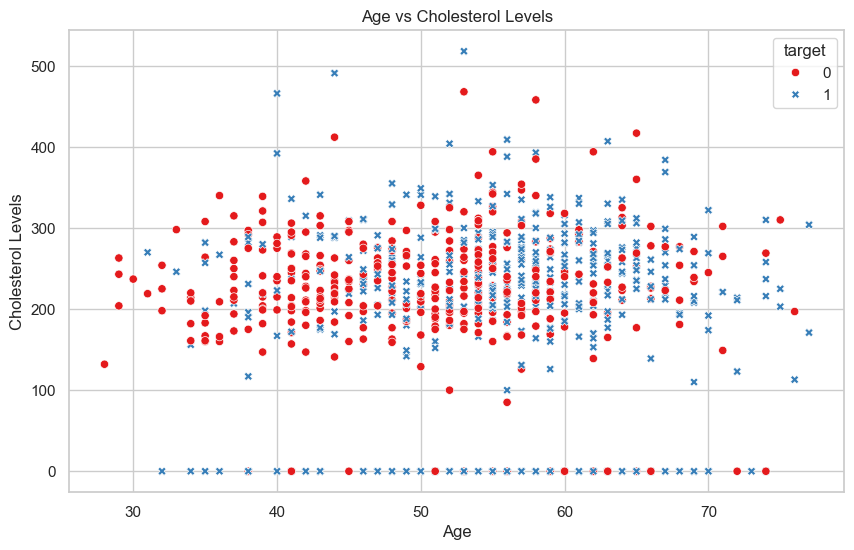

In [ ]:
# Linear correlation between Age and Cholesterol Levels?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='cholesterol', hue='target', style='target', palette='Set1')
plt.title('Age vs Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels')
plt.show()

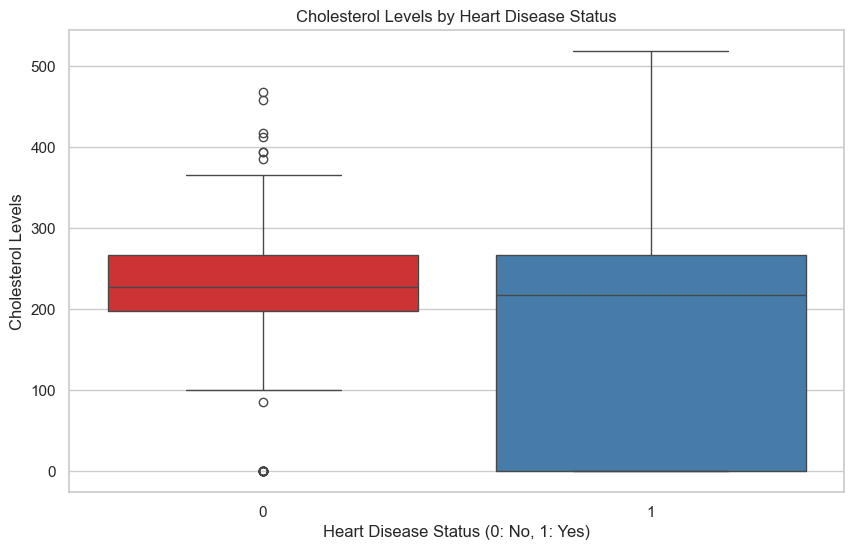

In [496]:
# Boxplot: Cholesterol Levels vs Target
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='cholesterol', palette='Set1')
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease Status (0: No, 1: Yes)')
plt.ylabel('Cholesterol Levels')
plt.show()

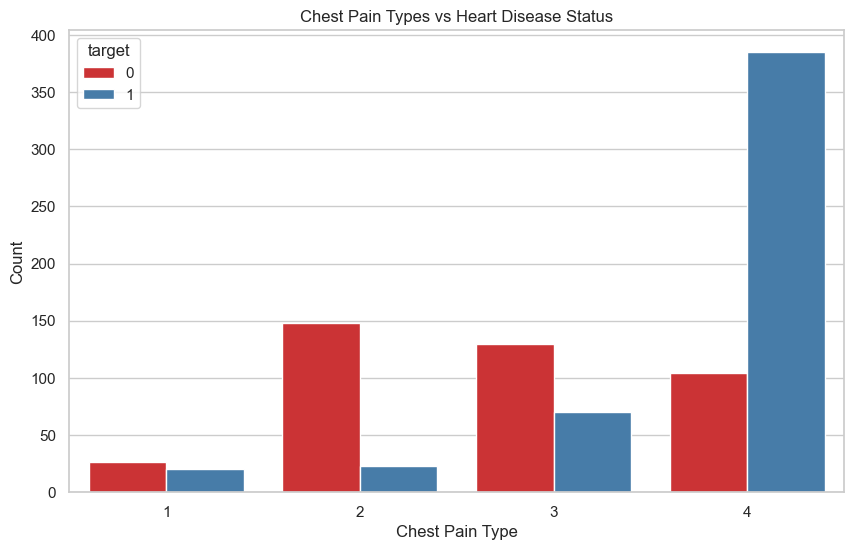

In [505]:
# visualisation of chestpain types vs target variable (heart disease)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='chest pain type', hue='target', palette='Set1')
plt.title('Chest Pain Types vs Heart Disease Status')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

9. LOGISTIC REGRESSION FOR HEART DISEASE PREDICTION

In [513]:
# Required imports
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [514]:
# select features and target variable
# update this list based on datasets
features = [
    'age', 'sex', 'chest pain type', 'resting systolic bp',
    'cholesterol', 'fasting blood sugar',
    'resting ECG', 'exercise angina', 'ST depression', 'ST slope',
    'hypertension', 'family history'
]

In [515]:
# Drop rows with missing values in the selected features
df = df[features + ['target']].dropna()
# Split the dataset into features and target variable
X = df[features]
y = df['target']

In [516]:
# Encode categorical variables
le = LabelEncoder()
for col in X.select_dtypes(include=['category']).columns:
    X[col] = le.fit_transform(X[col])

In [517]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [518]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [519]:
# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [522]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model and display accuracy in percentage
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Model: {:.2f}%".format(accuracy * 100))

Accuracy of Logistic Regression Model: 85.16%


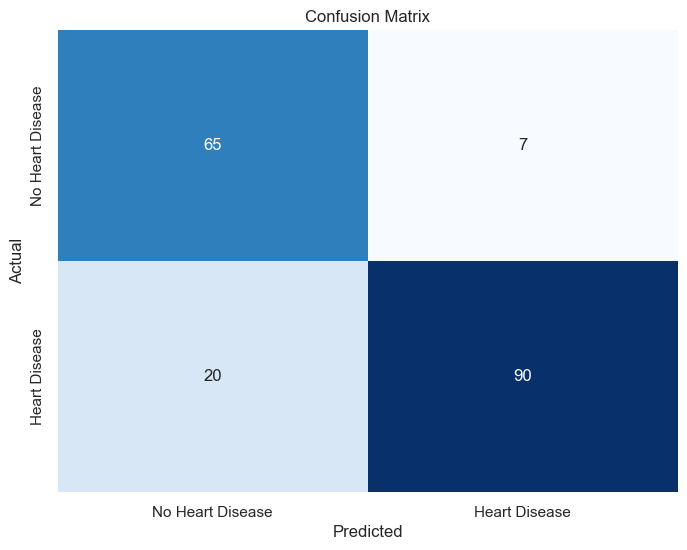

In [521]:

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

10. RANDOM FOREST FOR HEART DISEASE PREDICTION

In [524]:
# Random Forest Classifier for Heart Disease Prediction
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the model and display accuracy in percentage
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Model: {:.2f}%".format(accuracy_rf * 100))

Accuracy of Random Forest Model: 84.07%


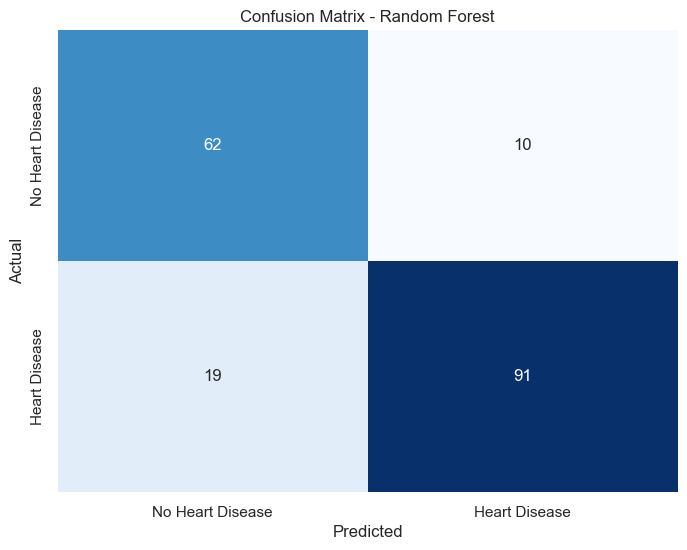

In [ ]:
# Display confusion matrix for Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()